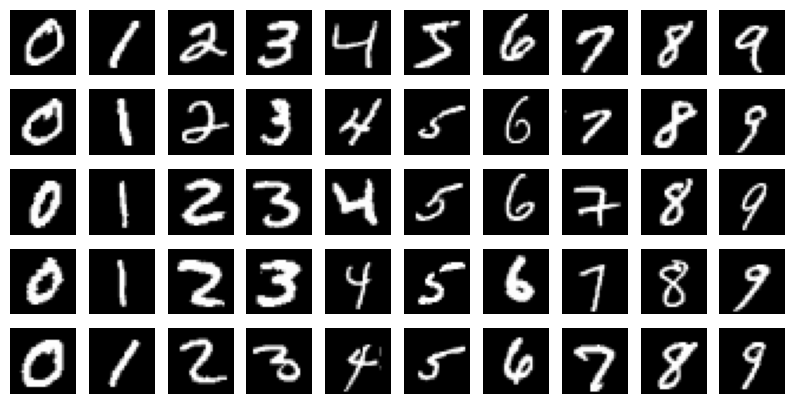

In [1]:
import torch 
from dataset import get_mnist
import matplotlib.pyplot as plt
import numpy as np


trainset, testset = get_mnist("./data")
mnist_full = torch.utils.data.ConcatDataset([trainset, testset])

def display_samples(dataset):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        # Get indices of samples for the current digit
        indices = []
        for j in range(len(dataset.datasets)):
            indices += (dataset.datasets[j].targets == i).nonzero().squeeze().tolist()
        # Plot first 5 samples of each digit
        for j in range(5):
            plt.subplot(5, 10, j*10+i+1)
            plt.imshow(dataset[indices[j]][0].numpy().squeeze(), cmap='gray')
            plt.axis('off')
    plt.show()

# Display sample images of each digit
display_samples(mnist_full)


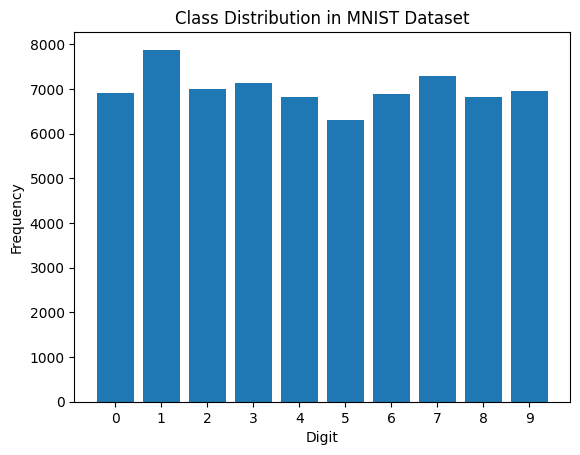

In [2]:
# Calculate class distribution
class_distribution = torch.zeros(10, dtype=torch.int)
for dataset in mnist_full.datasets:
    class_distribution += torch.bincount(dataset.targets, minlength=10)
# Plot class distribution
plt.bar(np.arange(10), class_distribution)
plt.xticks(np.arange(10), np.arange(10))
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.title('Class Distribution in MNIST Dataset')
plt.show()